<div style="text-align:center">

# ITESO — Instituto Tecnológico y de Estudios Superiores de Occidente
## Minería de Datos

**Profesor:** Miguel Tlapa Juarez
**Estudiantes:** Diego Lemus Sepulveda &nbsp;|&nbsp; Ponce Martin Jorge Arturo

**Proyecto:** *Escalamiento de Datos (numéricos y categóricos)*
**Fecha:** 7 de octubre de 2025

</div>

### Instalacion de librerias

In [2]:
from pandas.core.interchange import column
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\diego\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


## Cargar Librerias Necesarias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


# Cargar Archivo CSV

In [4]:
archivos = "data/codificar_datos_numericos_categoricos.csv"
df = pd.read_csv(archivos)
df.head()

,temperatura_corp,frecuencia_cardiaca,peso_kg,humedad_relativa_pct,ventas_mensuales,gastos_publicidad,tipo_cliente,canal_venta,ciudad
0,38.4,161,81.8,86,30912.0,9709.0,Nuevo,Distribuidor,Mérida
1,36.5,124,117.0,46,78937.0,14900.0,Nuevo,Distribuidor,Mérida
2,36.2,119,84.4,15,61576.0,14538.0,Nuevo,Distribuidor,Monterrey
3,37.7,130,90.9,59,60600.0,4787.0,Recurrente,Distribuidor,Mérida
4,38.5,89,56.4,40,59988.0,13985.0,Nuevo,Distribuidor,Guadalajara


# Detectar  las columnas que tienen Outliers

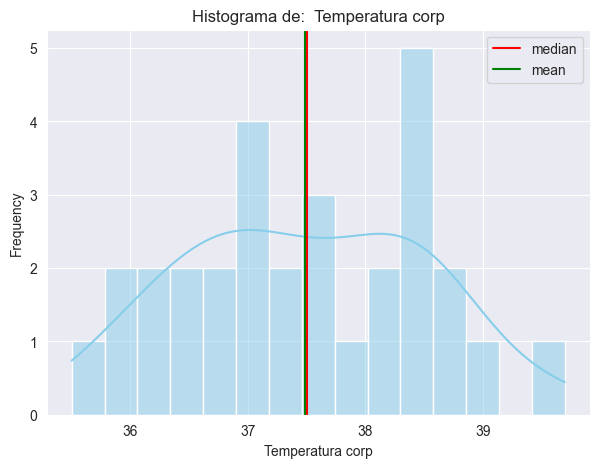

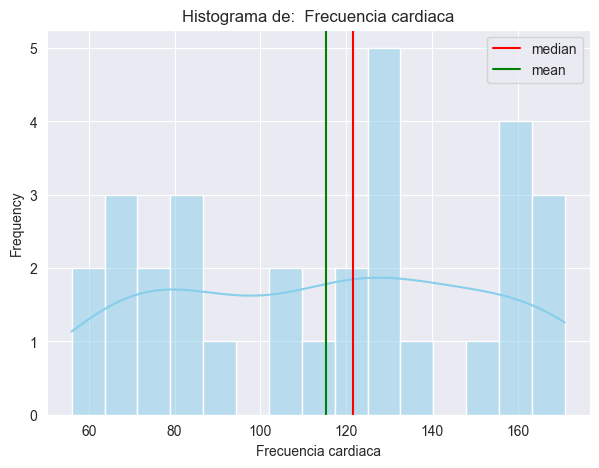

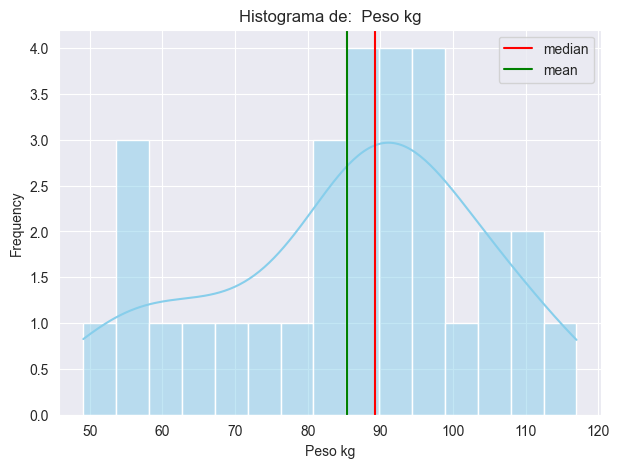

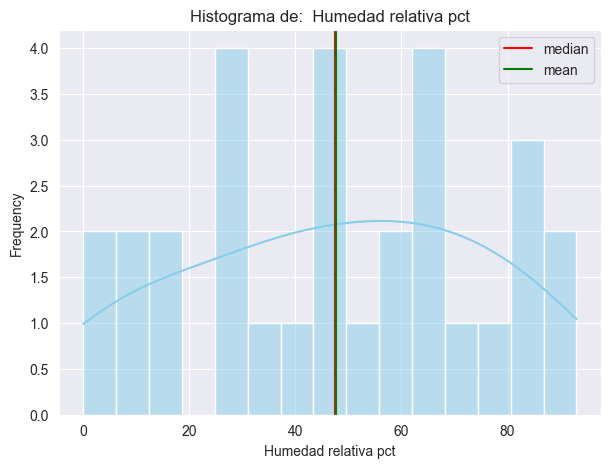

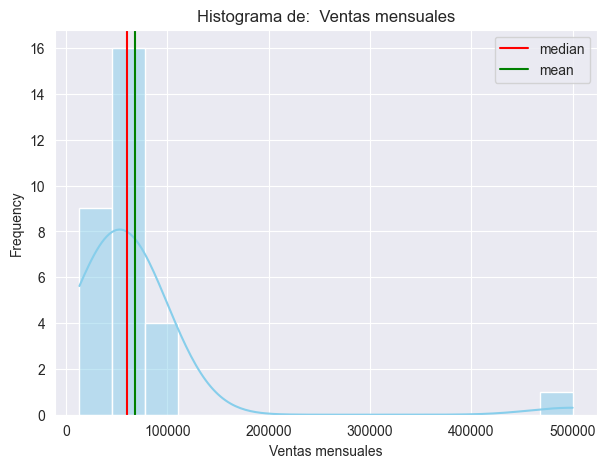

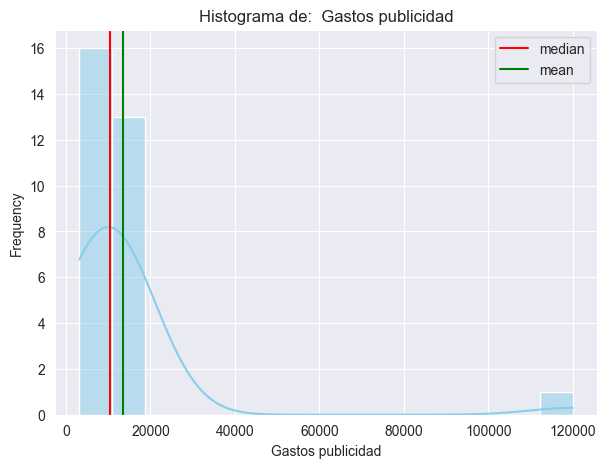

In [5]:
def hist_dist_normal(df, column):

    plt.figure(figsize = (7,5))
    sns.histplot(df[column],kde=True, bins = 15,color = 'skyblue')
    plt.axvline(df[column].median(), color='red', linestyle='-',label='median')
    plt.axvline(df[column].mean(), color='green', linestyle='-',label='mean')
    plt.title(f"Histograma de:  {column.replace('_', ' ').capitalize()}")
    plt.xlabel(column.replace('_', ' ').capitalize())
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


for col in df.select_dtypes(include=[np.number]):
    hist_dist_normal(df, col)


# Detectar las columnas que tienen outliers

In [6]:
outliers = []
for col in df.select_dtypes(include=[np.number]).columns:
    q1 = df[col].quantile(0.25)
    q3 =df[col].quantile(0.75)
    iqr = q3 - q1

    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]

    print(f"la columna {col.replace('_',' ')} tiene {len(outliers)} outliers")


la columna temperatura corp tiene 0 outliers
la columna frecuencia cardiaca tiene 0 outliers
la columna peso kg tiene 0 outliers
la columna humedad relativa pct tiene 0 outliers
la columna ventas mensuales tiene 1 outliers
la columna gastos publicidad tiene 1 outliers


# Seleccionar manualmente las columnas

In [7]:
columnas_standard = ['temperatura_corp']
columnas_minmax = ['humedad_relativa_pct']
columnas_robust = ['frecuencia_cardiaca', 'peso_kg', 'ventas_mensuales', 'gastos_publicidad']

# Aplicar el escalamiento Standard, Min_Max y Robust a las columnas seleccionadas manualmente

In [8]:
preprocesador = ColumnTransformer(
    transformers=[
        ("std", StandardScaler(), columnas_standard),
        ("minmax", MinMaxScaler(), columnas_minmax),
        ("robust", RobustScaler(quantile_range=(25, 75)), columnas_robust),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

preprocesador.fit(df)

x_escalado = preprocesador.transform(df)


### Escalamientos categoricos

In [16]:
cols_onehot   = ['canal_venta', 'ciudad']      # sin orden
cols_ordinal  = ['tipo_cliente']        # con orden
categorias_ordinales = [["Nuevo", "Recurrente", "VIP"]]                                             # talla

df.select_dtypes(exclude=[np.number]).head(100)

,tipo_cliente,canal_venta,ciudad
0,Nuevo,Distribuidor,Mérida
1,Nuevo,Distribuidor,Mérida
2,Nuevo,Distribuidor,Monterrey
3,Recurrente,Distribuidor,Mérida
4,Nuevo,Distribuidor,Guadalajara
5,Recurrente,Online,Mérida
6,Nuevo,Tienda,CDMX
7,Recurrente,Tienda,CDMX
8,VIP,Online,Querétaro
9,VIP,Online,Monterrey


In [17]:
preprocesador = ColumnTransformer(
    transformers=[
        ("onehot",
         OneHotEncoder(sparse_output=False, drop=None, handle_unknown="ignore"),
         cols_onehot),
        ("ordinal",
         OrdinalEncoder(categories=categorias_ordinales,
                        handle_unknown="use_encoded_value", unknown_value=-1),
         cols_ordinal),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

preprocesador.fit(df)

X_encoded = preprocesador.transform(df)

# Escalado y Guardado

In [20]:

X_encoded

columnas_escaladas = preprocesador.get_feature_names_out()
datos_escalado = pd.DataFrame(X_encoded, columns=columnas_escaladas, index=df.index)

datos_escalado.to_csv("codificar_datos_categoricos_listo.csv",index=True)

# Impresion

In [70]:
x_escalado

array([[ 8.96248374e-01,  9.24731183e-01,  5.74545455e-01,
        -3.36700337e-01, -9.77494361e-01, -1.34884117e-01],
       [-9.68209923e-01,  4.94623656e-01,  3.63636364e-02,
         1.24354658e+00,  6.51493309e-01,  7.49744376e-01],
       [-1.26259807e+00,  1.61290323e-01, -3.63636364e-02,
        -2.19977553e-01,  6.26155386e-02,  6.88053851e-01],
       [ 2.09342686e-01,  6.34408602e-01,  1.23636364e-01,
         7.18294052e-02,  2.95100317e-02, -9.73670757e-01],
       [ 9.94377758e-01,  4.30107527e-01, -4.72727273e-01,
        -1.47699214e+00,  8.75125078e-03,  5.93813906e-01],
       [-3.79433618e-01,  2.68817204e-01, -1.23636364e-01,
         7.40740741e-01, -6.90059868e-01,  3.15013633e-01],
       [ 2.17193037e+00,  4.83870968e-01, -8.21818182e-01,
         4.04040404e-02,  1.12952190e-02,  3.07004090e-01],
       [ 8.96248374e-01,  5.26881720e-01, -6.47272727e-01,
        -1.39169473e-01,  1.49337720e+01,  4.46574642e-01],
       [-8.50454662e-02,  0.00000000e+00,  1.527

# Reconstruccion de Data Frame

In [71]:
columnas_escaladas = preprocesador.get_feature_names_out()
datos_escalado = pd.DataFrame(X_escalado, columns=columnas_escaladas, index=df.index)
datos_escalado

,temperatura_corp,humedad_relativa_pct,frecuencia_cardiaca,peso_kg,ventas_mensuales,gastos_publicidad
0,0.896248,0.924731,0.574545,-0.336700,-0.977494,-0.134884
1,-0.968210,0.494624,0.036364,1.243547,0.651493,0.749744
2,-1.262598,0.161290,-0.036364,-0.219978,0.062616,0.688054
3,0.209343,0.634409,0.123636,0.071829,0.029510,-0.973671
4,0.994378,0.430108,-0.472727,-1.476992,0.008751,0.593814
5,-0.379434,0.268817,-0.123636,0.740741,-0.690060,0.315014
6,2.171930,0.483871,-0.821818,0.040404,0.011295,0.307004
7,0.896248,0.526882,-0.647273,-0.139169,14.933772,0.446575
8,-0.085045,0.000000,0.152727,-0.776655,-0.921697,0.756902
9,-0.477563,0.376344,-0.705455,-0.897868,0.020487,18.660446


# REORDENAR

In [72]:
orden_original = [c for c in df.columns if c in datos_escalado.columns]
datos_escalado = datos_escalado[orden_original]
datos_escalado

,temperatura_corp,frecuencia_cardiaca,peso_kg,humedad_relativa_pct,ventas_mensuales,gastos_publicidad
0,0.896248,0.574545,-0.336700,0.924731,-0.977494,-0.134884
1,-0.968210,0.036364,1.243547,0.494624,0.651493,0.749744
2,-1.262598,-0.036364,-0.219978,0.161290,0.062616,0.688054
3,0.209343,0.123636,0.071829,0.634409,0.029510,-0.973671
4,0.994378,-0.472727,-1.476992,0.430108,0.008751,0.593814
5,-0.379434,-0.123636,0.740741,0.268817,-0.690060,0.315014
6,2.171930,-0.821818,0.040404,0.483871,0.011295,0.307004
7,0.896248,-0.647273,-0.139169,0.526882,14.933772,0.446575
8,-0.085045,0.152727,-0.776655,0.000000,-0.921697,0.756902
9,-0.477563,-0.705455,-0.897868,0.376344,0.020487,18.660446


In [73]:
datos_escalado.to_csv("escalar_datos_listos.csv",index=True)